<a href="https://colab.research.google.com/github/deyaliao/surestart2021/blob/main/houseprices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# import all packages

import os # accessing directory structure
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt # plotting
%matplotlib inline


In [1]:
# import data and download
from google.colab import files
uploaded = files.upload()


Saving housepricedata.csv to housepricedata.csv


In [5]:
df = pd.read_csv('housepricedata.csv')
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [7]:
# convert to arrays
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [8]:
# split all features
X = dataset[:,0:10]
Y = dataset[:,10]


In [11]:
# data preprocessing
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


create model itself

In [14]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])


In [15]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# train
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.6896 - accuracy: 0.5691 - val_loss: 0.6788 - val_accuracy: 0.6712
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6857 - val_loss: 0.6726 - val_accuracy: 0.7443
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.7227 - val_loss: 0.6673 - val_accuracy: 0.7397
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.7287 - val_loss: 0.6622 - val_accuracy: 0.7580
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.7246 - val_loss: 0.6572 - val_accuracy: 0.7626
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6502 - accuracy: 0.7573 - val_loss: 0.6521 - val_accuracy: 0.7671
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6488 - accuracy: 0.7545 - val_loss: 0.6472 - val_accuracy: 0.7717
Epoch 8/100
3

In [16]:
# original accuracy
model.evaluate(X_test, Y_test)[1]


7/7 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.9041


0.9041095972061157

important: visualizing loss and accuracy --> how can we improve our model?

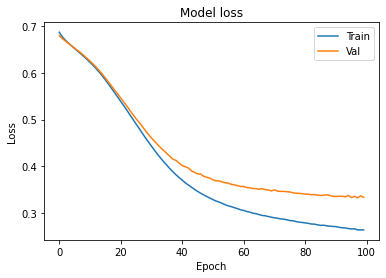

In [17]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


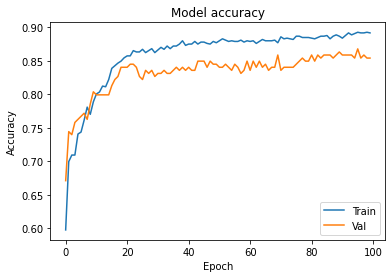

In [19]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


addressing overfitting


In [20]:
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])


In [21]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Epoch 1/100
32/32 [==============================] - 3s 53ms/step - loss: 21.0997 - accuracy: 0.5466 - val_loss: 3.9130 - val_accuracy: 0.7945
Epoch 2/100
32/32 [==============================] - 1s 46ms/step - loss: 2.4817 - accuracy: 0.7983 - val_loss: 0.6776 - val_accuracy: 0.8402
Epoch 3/100
32/32 [==============================] - 2s 47ms/step - loss: 0.6070 - accuracy: 0.8681 - val_loss: 0.5557 - val_accuracy: 0.8402
Epoch 4/100
32/32 [==============================] - 1s 46ms/step - loss: 0.4746 - accuracy: 0.9006 - val_loss: 0.5149 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 1s 47ms/step - loss: 0.4971 - accuracy: 0.8698 - val_loss: 0.5029 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 2s 47ms/step - loss: 0.4801 - accuracy: 0.8737 - val_loss: 0.5778 - val_accuracy: 0.8356
Epoch 7/100
32/32 [==============================] - 1s 46ms/step - loss: 0.4777 - accuracy: 0.8685 - val_loss: 0.5588 - val_accuracy: 0.8311
Epoch

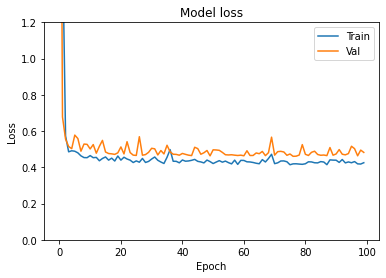

In [22]:
# visualize loss
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()


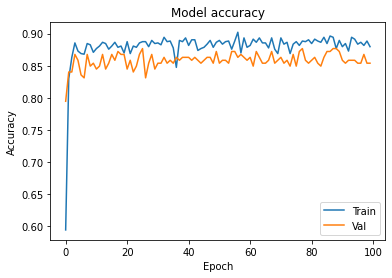

In [23]:
# visualize accuracy
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [25]:
# accuracy
model_3.evaluate(X_test, Y_test)[1]


7/7 [==============================] - 0s 12ms/step - loss: 0.4004 - accuracy: 0.9041


0.9041095972061157